<div style="width: 100%; overflow: hidden;">
    <div style="width: 150px; float: left;"> <img src="data/D4Sci_logo_ball.png" alt="Data For Science, Inc" align="left" border="0"> </div>
    <div style="float: left; margin-left: 10px;"> <h1>NLP with Deep Learning for Everyone</h1>
<h1>Sequence Modeling</h1>
        <p>Bruno Gonçalves<br/>
        <a href="http://www.data4sci.com/">www.data4sci.com</a><br/>
            @bgoncalves, @data4sci</p></div>
</div>

In [1]:
import warnings
warnings.filterwarnings('ignore')

import gzip
from collections import Counter
from pprint import pprint

import pandas as pd
import numpy as np
np.random.seed(42)

import matplotlib
import matplotlib.pyplot as plt 

from tqdm import tqdm
tqdm.pandas()

import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Embedding, SimpleRNN
from keras.layers import LSTM, GRU
from keras.layers import Dense
from keras.datasets import imdb
from keras.preprocessing import sequence

import watermark

%load_ext watermark
%matplotlib inline

We start by print out the versions of the libraries we're using for future reference

In [2]:
%watermark -n -v -m -g -iv

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 20.5.0
Machine     : x86_64
Processor   : i386
CPU cores   : 16
Architecture: 64bit

Git hash: 39ce5cf3bd8432047933c28fa699f7e39cb38900

keras     : 2.4.3
json      : 2.0.9
tensorflow: 2.5.0
matplotlib: 3.3.2
pandas    : 1.1.3
watermark : 2.1.0
numpy     : 1.19.2



Load default figure style

In [3]:
plt.style.use('./d4sci.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

# Load the IMDB dataset

In [4]:
top_words = 10000
max_words = 500

(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=top_words)

word_dict = imdb.get_word_index()
word_list = ["<PAD>", "<START>", "<UNK>", "<UNUSED>"]
word_list.extend([k for k, v in sorted(word_dict.items(), key = lambda x:x[1])])
word_list = np.array(word_list)

In [5]:
X_train = sequence.pad_sequences(X_train, maxlen=max_words)
X_test = sequence.pad_sequences(X_test, maxlen=max_words)

# SimpleRNN model

In [6]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          320000    
_________________________________________________________________
simple_rnn (SimpleRNN)       (None, 32)                2080      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [7]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 36s 106ms/step - loss: 0.6874 - accuracy: 0.5336 - val_loss: 0.6502 - val_accuracy: 0.6006
Epoch 2/10
196/196 [==============================] - 21s 109ms/step - loss: 0.5804 - accuracy: 0.7147 - val_loss: 0.5018 - val_accuracy: 0.7668
Epoch 3/10
196/196 [==============================] - 30s 153ms/step - loss: 0.2887 - accuracy: 0.8958 - val_loss: 0.4819 - val_accuracy: 0.7885
Epoch 4/10
196/196 [==============================] - 39s 200ms/step - loss: 0.1258 - accuracy: 0.9609 - val_loss: 0.5370 - val_accuracy: 0.7857
Epoch 5/10
196/196 [==============================] - 41s 210ms/step - loss: 0.0458 - accuracy: 0.9916 - val_loss: 0.5824 - val_accuracy: 0.8002
Epoch 6/10
196/196 [==============================] - 40s 204ms/step - loss: 0.0165 - accuracy: 0.9983 - val_loss: 0.7082 - val_accuracy: 0.7652
Epoch 7/10
196/196 [==============================] - 40s 206ms/step - loss: 0.0095 - accuracy: 0.9997 - val_loss: 0.6694 - val_ac

In [8]:
def plot_history(history):    
    fig, ax_lst = plt.subplots(1, 2, sharex=True, sharey=True)

    epochs = np.array(history.epoch) + 1
    
    ax_lst[0].plot(epochs, history.history['loss'], label='Training')
    ax_lst[0].plot(epochs, history.history['val_loss'], label='Testing')
    ax_lst[0].set_ylabel('Loss')
    ax_lst[0].set_xlabel('Epoch')
    ax_lst[0].set_xticks(epochs)
    
    best_epoch = np.argmin(history.history['val_loss']) + 1
    ax_lst[0].axvline(x=best_epoch, linestyle=':', color=colors[2])
    ax_lst[0].legend()
    

    ax_lst[1].plot(epochs, history.history['accuracy'], label='Training')
    ax_lst[1].plot(epochs, history.history['val_accuracy'], label='Testing')
    ax_lst[1].set_ylabel('Accuracy')
    ax_lst[1].set_xlabel('Epoch')
    ax_lst[1].set_xticks(epochs)
    ax_lst[1].axvline(x=best_epoch, linestyle=':', color=colors[2])


    fig.tight_layout()

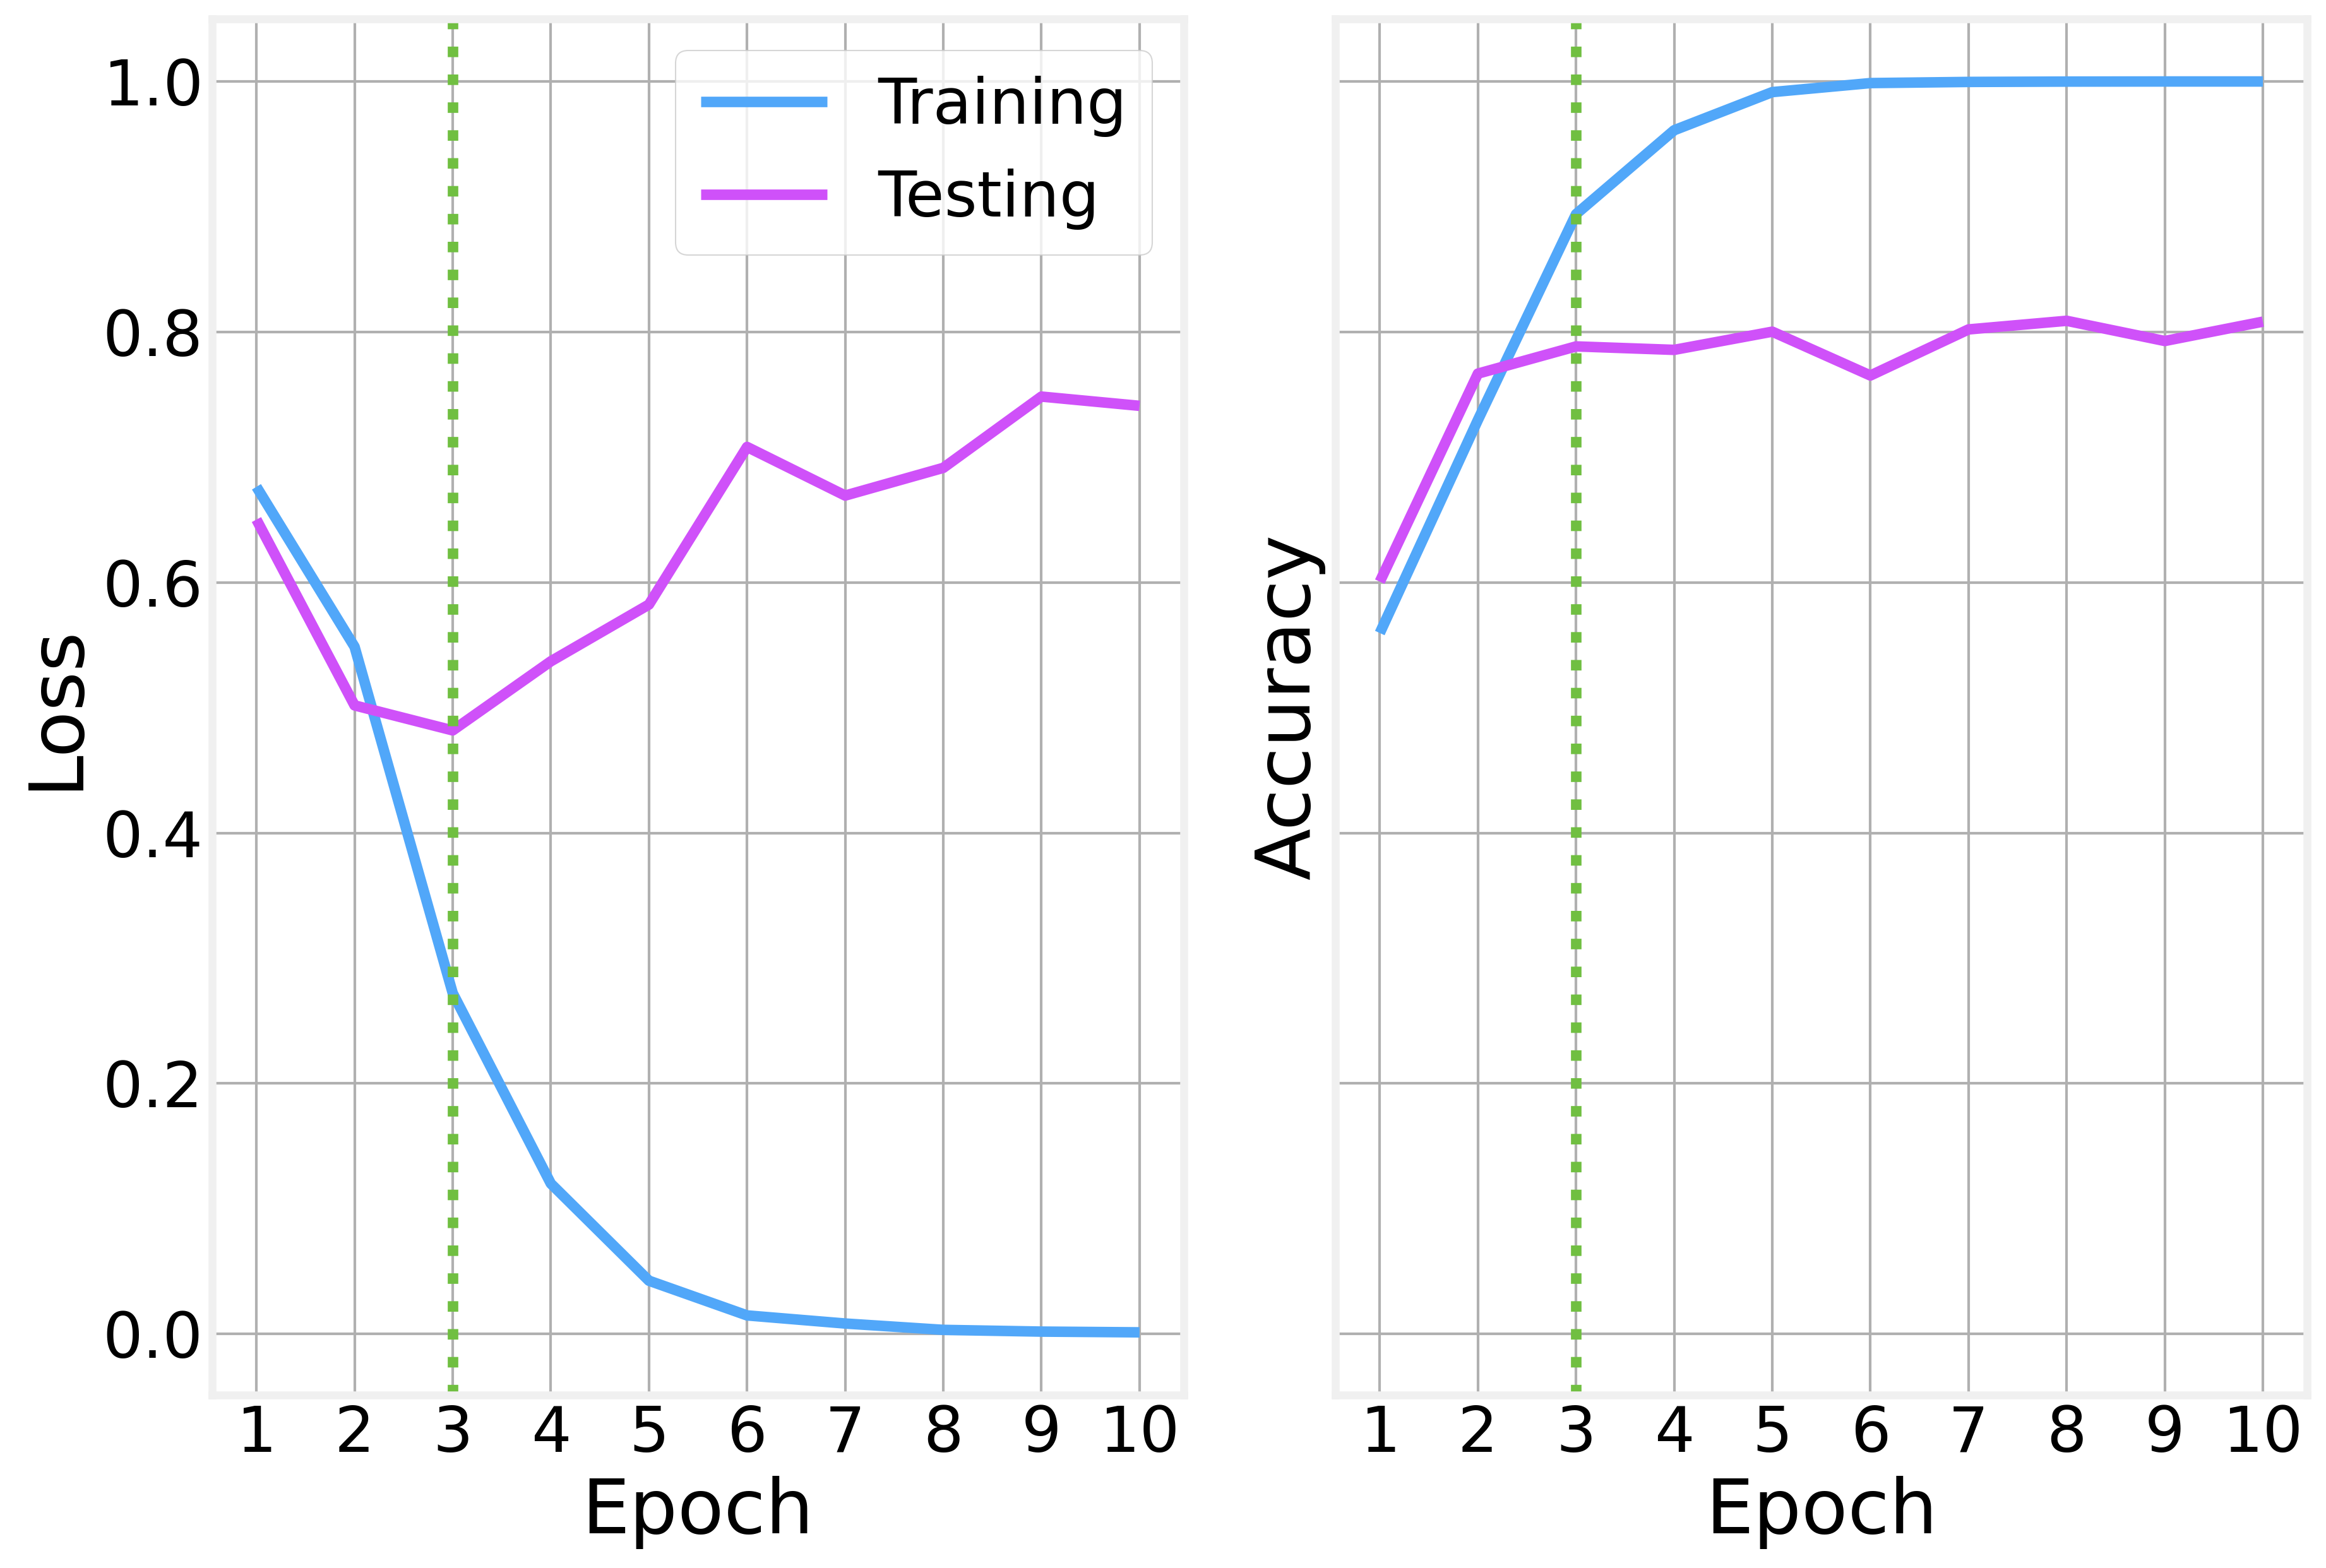

In [9]:
plot_history(history)

# GRU

In [10]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(GRU(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru (GRU)                    (None, 32)                6336      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 326,369
Trainable params: 326,369
Non-trainable params: 0
_________________________________________________________________


In [11]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 41s 195ms/step - loss: 0.6036 - accuracy: 0.6439 - val_loss: 0.3522 - val_accuracy: 0.8474
Epoch 2/10
196/196 [==============================] - 38s 196ms/step - loss: 0.2449 - accuracy: 0.9050 - val_loss: 0.3183 - val_accuracy: 0.8730
Epoch 3/10
196/196 [==============================] - 35s 177ms/step - loss: 0.1791 - accuracy: 0.9349 - val_loss: 0.3227 - val_accuracy: 0.8684
Epoch 4/10
196/196 [==============================] - 36s 185ms/step - loss: 0.1440 - accuracy: 0.9488 - val_loss: 0.3795 - val_accuracy: 0.8682
Epoch 5/10
196/196 [==============================] - 37s 190ms/step - loss: 0.1183 - accuracy: 0.9616 - val_loss: 0.3780 - val_accuracy: 0.8626
Epoch 6/10
196/196 [==============================] - 37s 191ms/step - loss: 0.1032 - accuracy: 0.9675 - val_loss: 0.4190 - val_accuracy: 0.8537
Epoch 7/10
196/196 [==============================] - 37s 191ms/step - loss: 0.0856 - accuracy: 0.9741 - val_loss: 0.4614 - val_ac

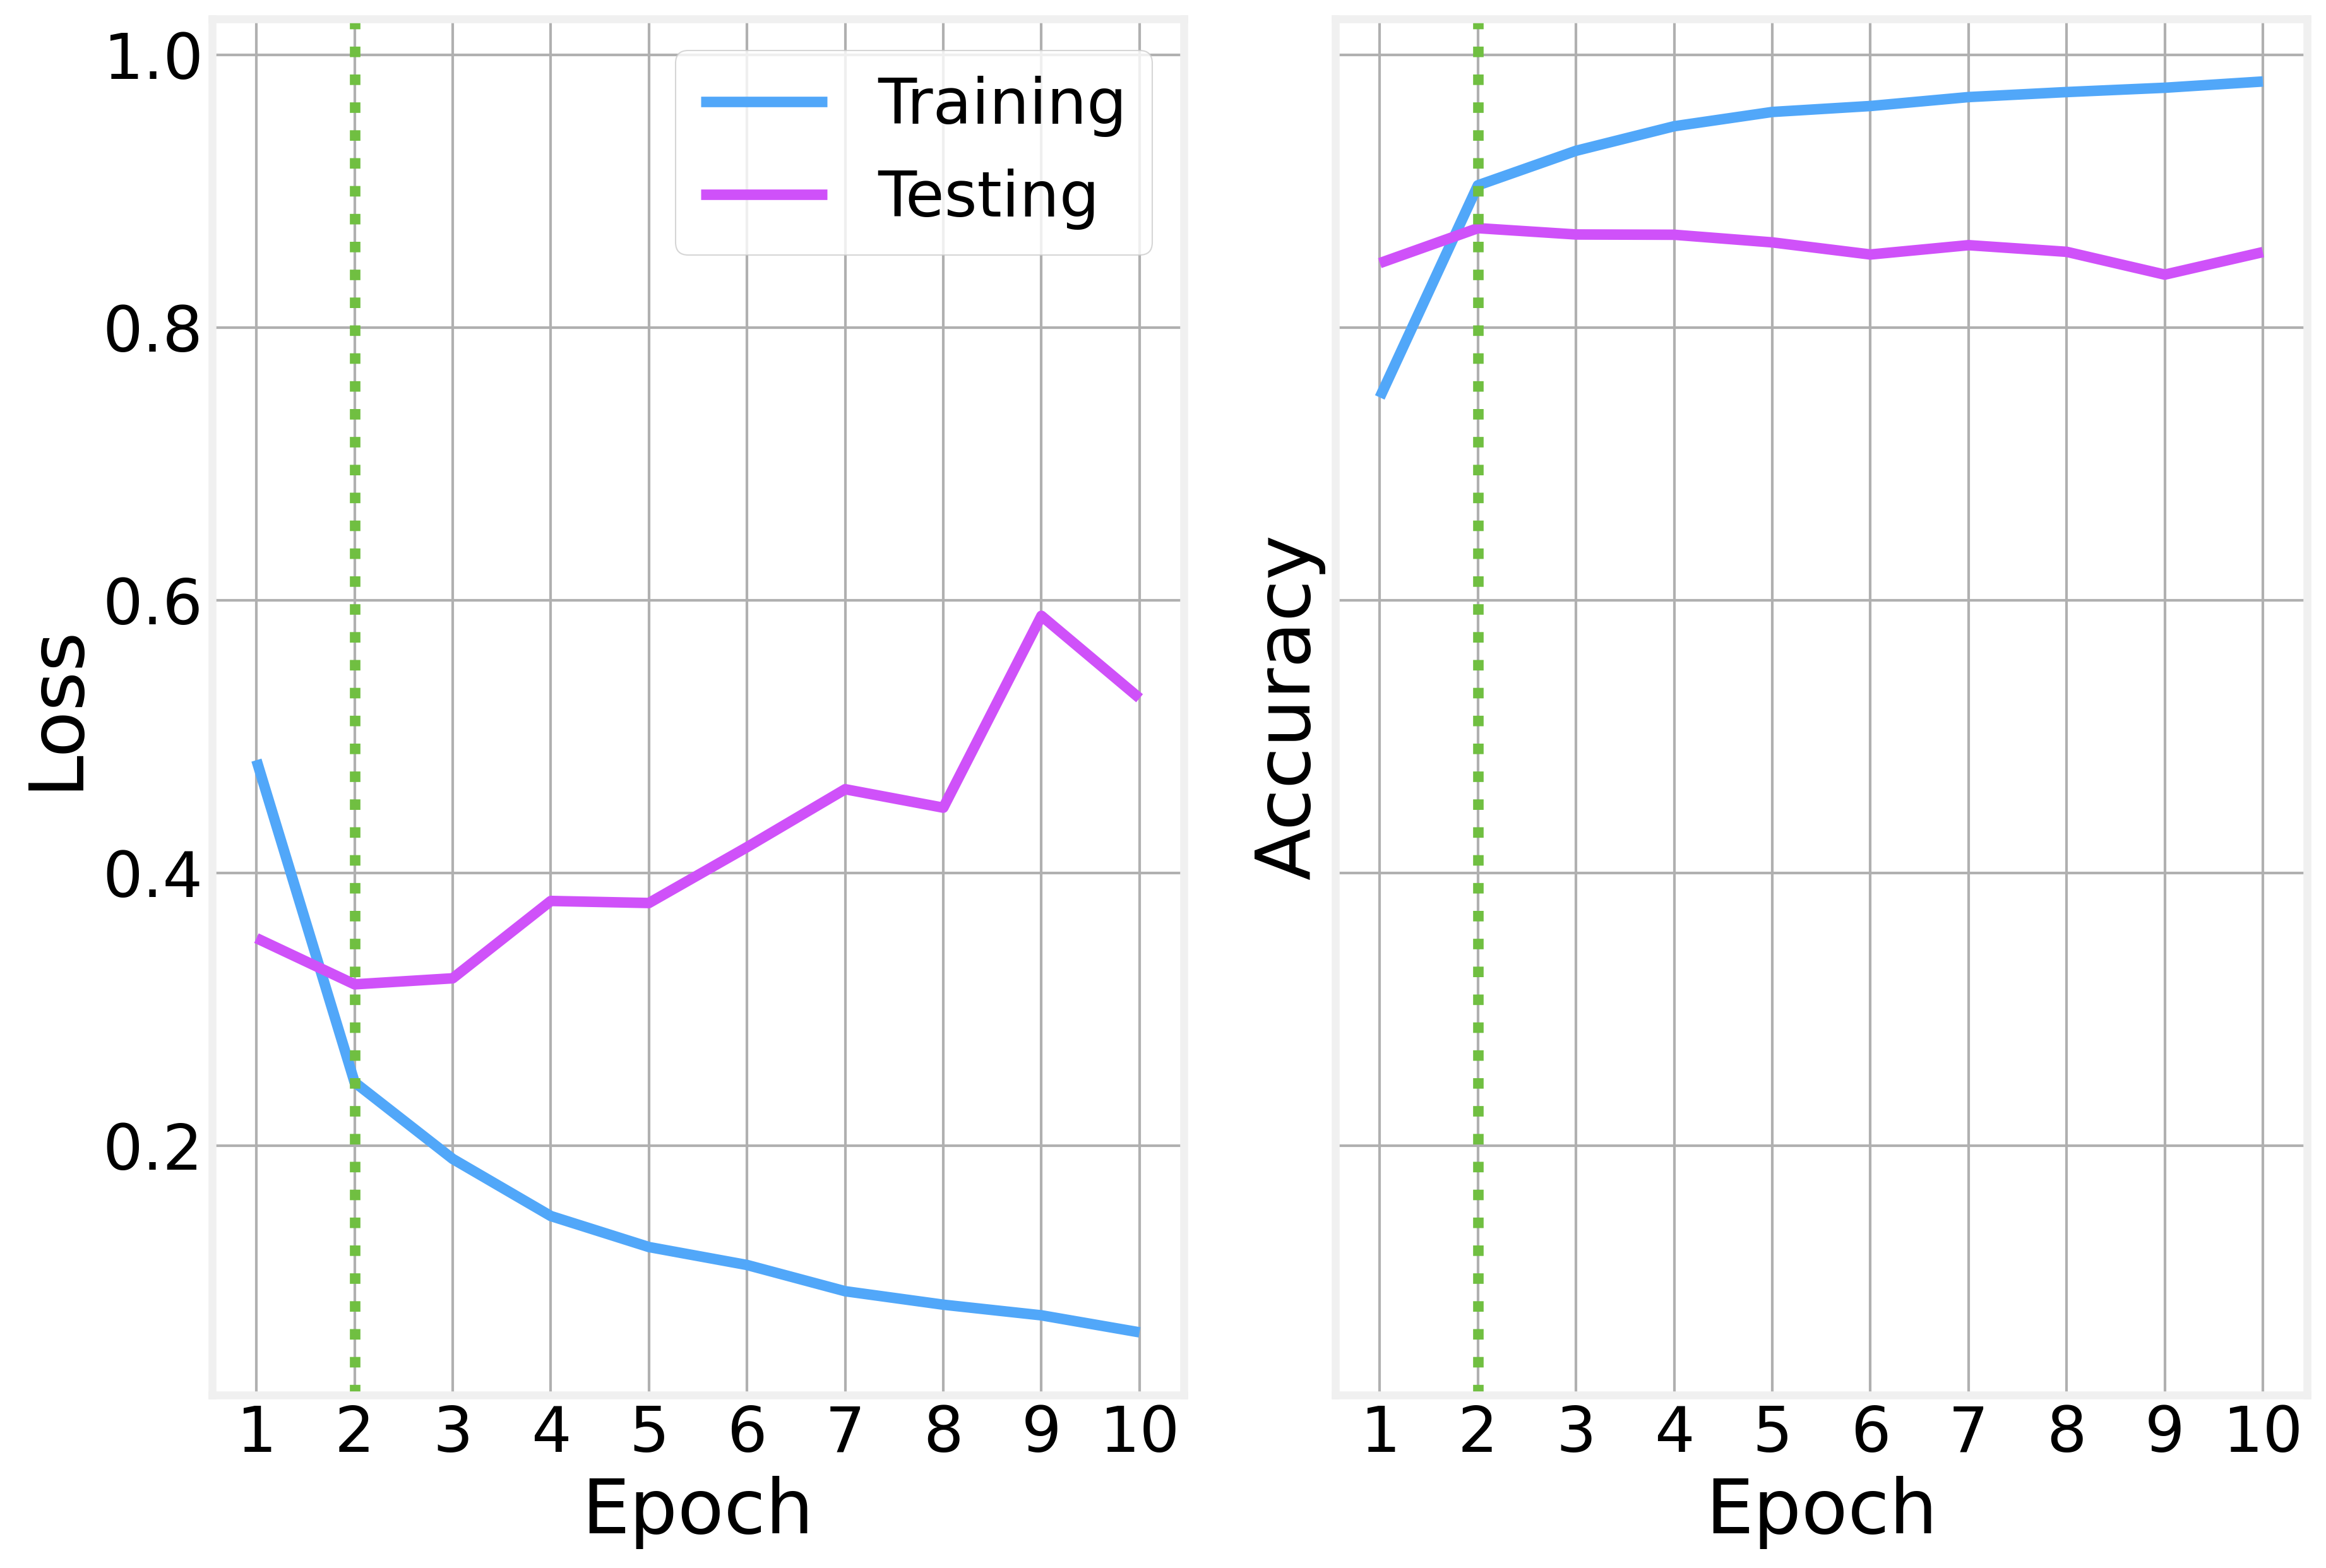

In [12]:
plot_history(history)

# LSTM

In [13]:
model = Sequential()
model.add(Embedding(top_words, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 328,353
Trainable params: 328,353
Non-trainable params: 0
_________________________________________________________________


In [14]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test, y_test), # The testing data for validation
                    epochs=10, # How many epochs to train for
                    batch_size=128, # The batch size. Gradients are updated after each batch 
                    verbose=1) # The level of detail in the output

Epoch 1/10
196/196 [==============================] - 42s 201ms/step - loss: 0.5995 - accuracy: 0.6490 - val_loss: 0.3191 - val_accuracy: 0.8686
Epoch 2/10
196/196 [==============================] - 39s 198ms/step - loss: 0.2534 - accuracy: 0.9030 - val_loss: 0.2903 - val_accuracy: 0.8790
Epoch 3/10
196/196 [==============================] - 37s 190ms/step - loss: 0.1798 - accuracy: 0.9379 - val_loss: 0.3052 - val_accuracy: 0.8748
Epoch 4/10
196/196 [==============================] - 38s 196ms/step - loss: 0.1392 - accuracy: 0.9520 - val_loss: 0.3510 - val_accuracy: 0.8724
Epoch 5/10
196/196 [==============================] - 40s 202ms/step - loss: 0.1107 - accuracy: 0.9643 - val_loss: 0.3558 - val_accuracy: 0.8687
Epoch 6/10
196/196 [==============================] - 39s 200ms/step - loss: 0.0908 - accuracy: 0.9724 - val_loss: 0.4144 - val_accuracy: 0.8666
Epoch 7/10
196/196 [==============================] - 38s 193ms/step - loss: 0.0759 - accuracy: 0.9782 - val_loss: 0.5008 - val_ac

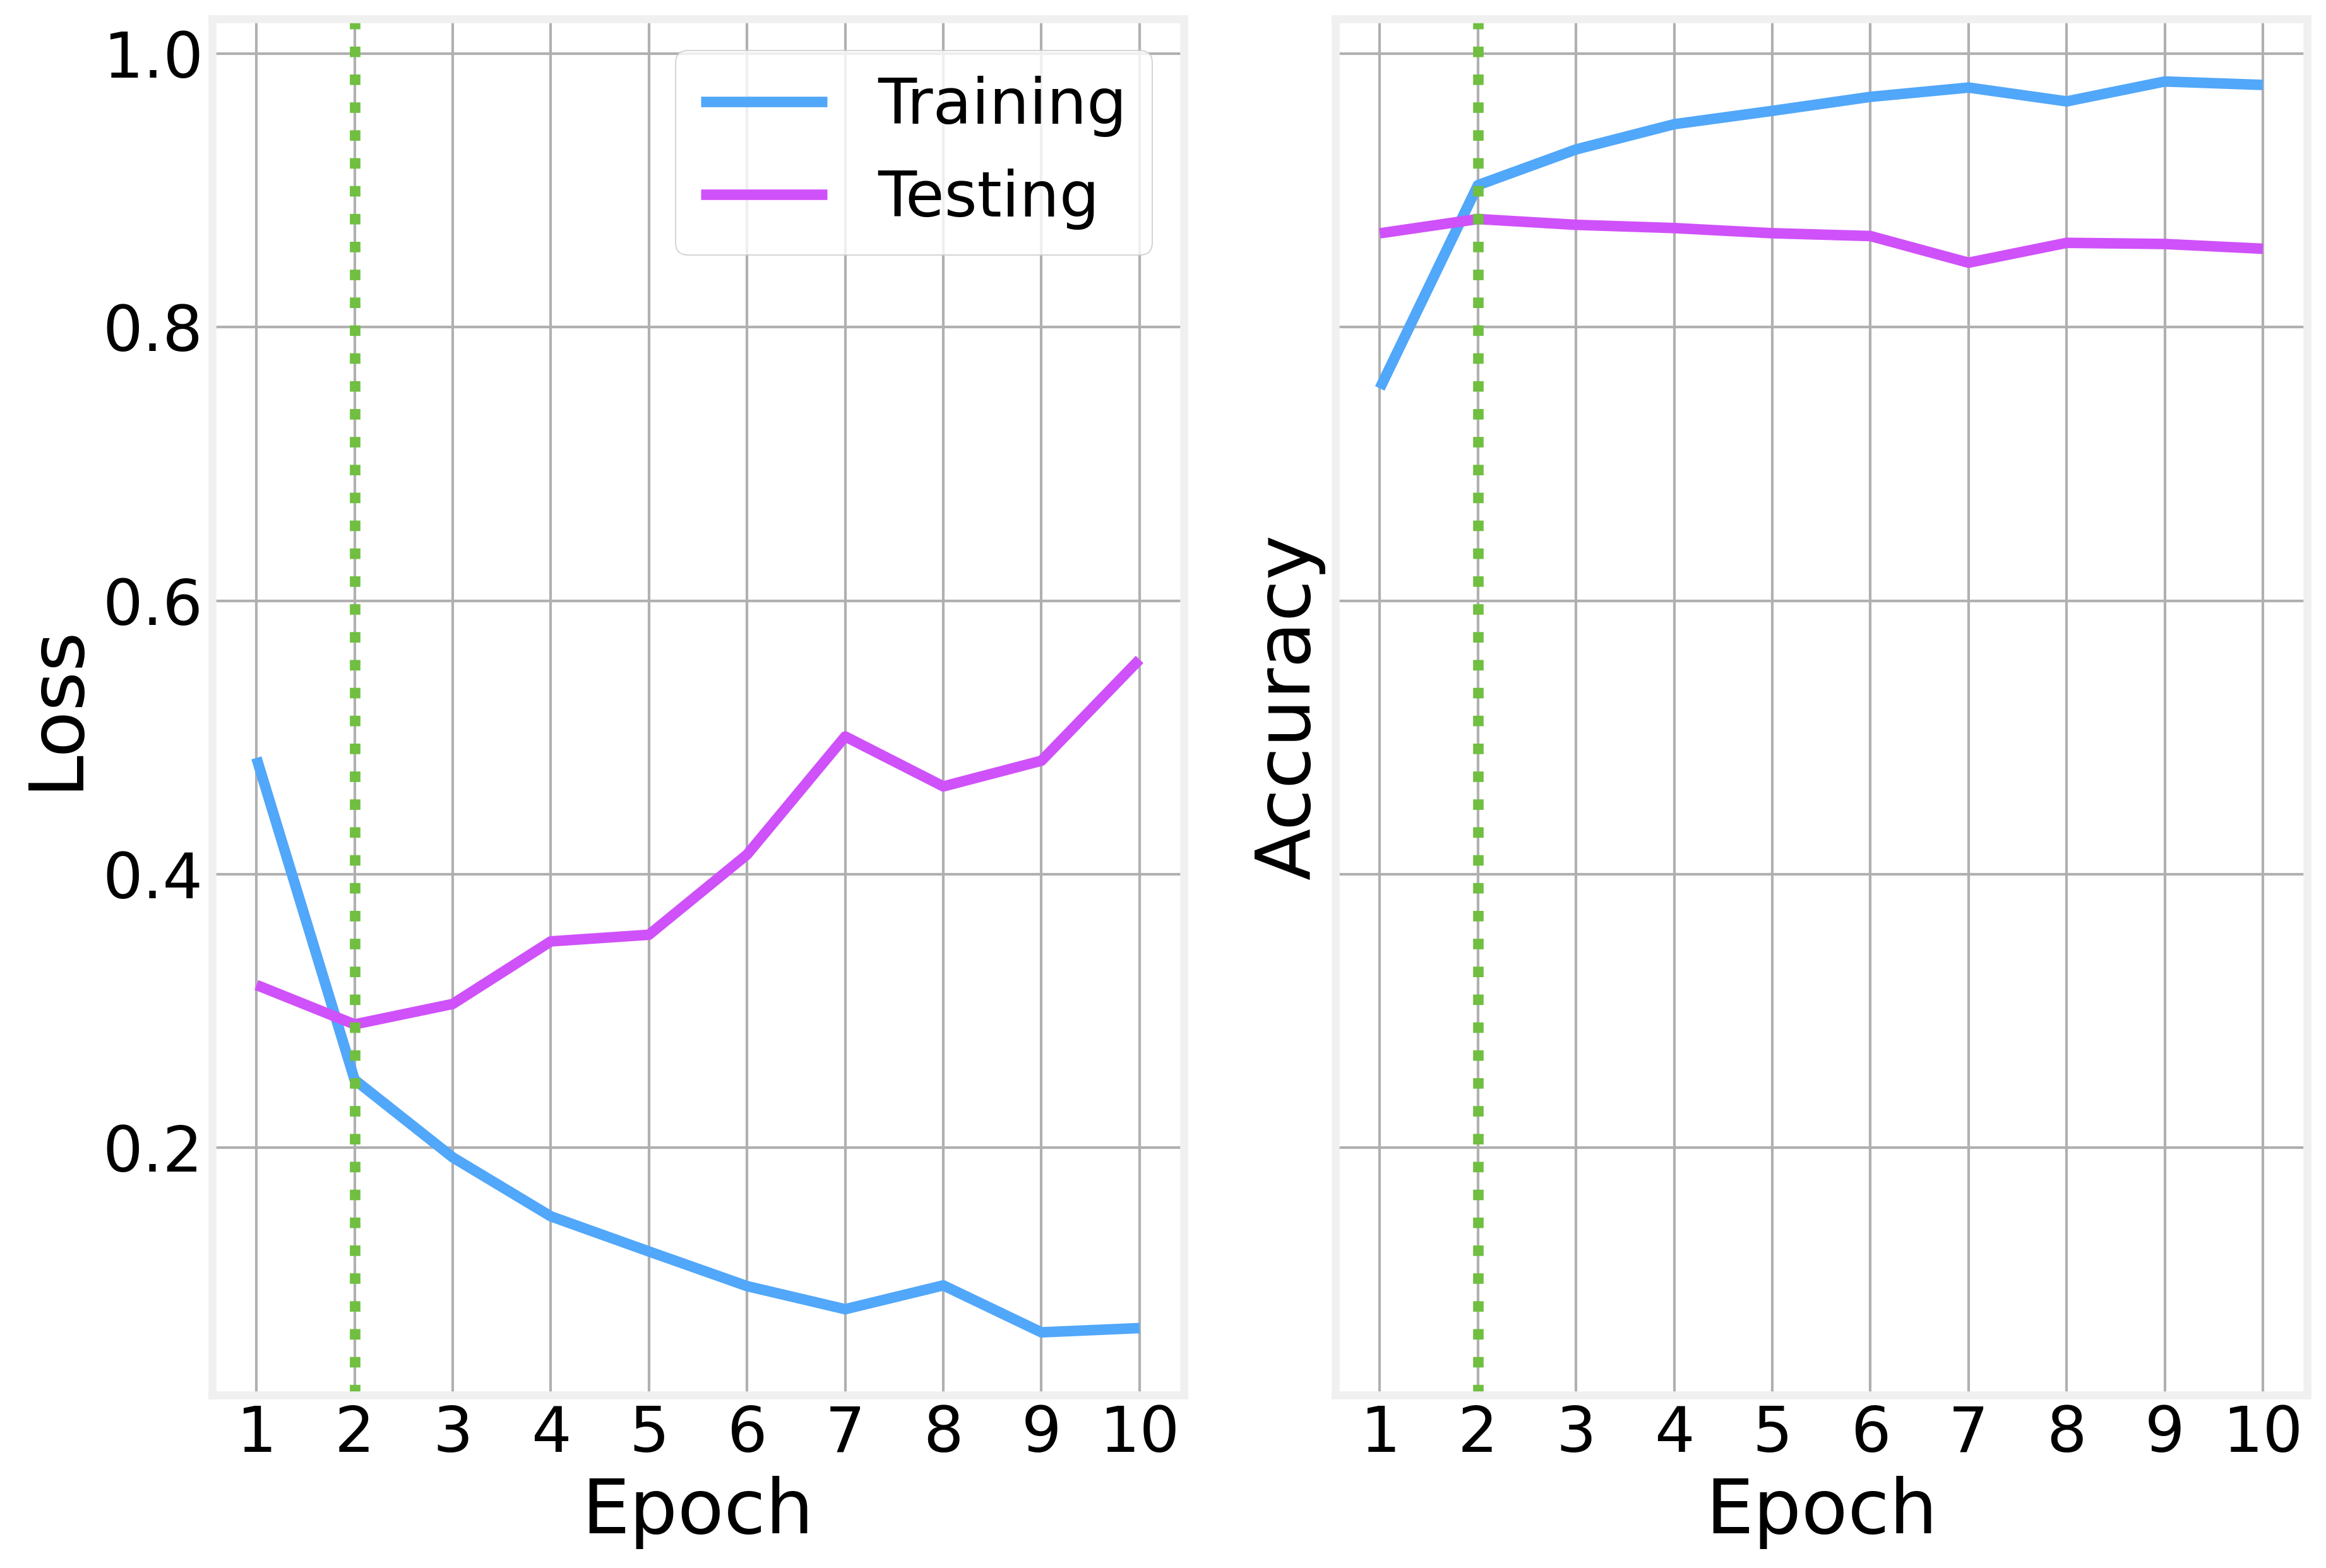

In [15]:
plot_history(history)

<div style="width: 100%; overflow: hidden;">
     <img src="data/D4Sci_logo_full.png" alt="Data For Science, Inc" align="center" border="0" width=300px> 
</div>